<a href="https://colab.research.google.com/github/michaelbirbaumer/Coding-Task-2/blob/main/Coding%20Task%202%2C%20Version%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm

In [29]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Coding-Task-2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!pip install pillow_heif

In [31]:
#Change the file format of images from '.HEIC' (an iPhone file) to '.png'
from PIL import Image
import pillow_heif

for i in range(79,94):
  link = '/content/drive/MyDrive/Coding-Task-2'
  name = 'IMG_53' + str(i)
  print(name)
  heif_file = pillow_heif.read(link + '/' + name + '.HEIC')
  image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw")
  name = name.split('.')[0] + '.png'
  image.save(link + name, format = "png")
  print(link)

IMG_5379
/content/drive/MyDrive/Coding-Task-2
IMG_5380
/content/drive/MyDrive/Coding-Task-2
IMG_5381
/content/drive/MyDrive/Coding-Task-2
IMG_5382
/content/drive/MyDrive/Coding-Task-2
IMG_5383
/content/drive/MyDrive/Coding-Task-2
IMG_5384
/content/drive/MyDrive/Coding-Task-2
IMG_5385
/content/drive/MyDrive/Coding-Task-2
IMG_5386
/content/drive/MyDrive/Coding-Task-2
IMG_5387
/content/drive/MyDrive/Coding-Task-2
IMG_5388
/content/drive/MyDrive/Coding-Task-2
IMG_5389
/content/drive/MyDrive/Coding-Task-2
IMG_5390
/content/drive/MyDrive/Coding-Task-2
IMG_5391
/content/drive/MyDrive/Coding-Task-2
IMG_5392
/content/drive/MyDrive/Coding-Task-2
IMG_5393
/content/drive/MyDrive/Coding-Task-2


(2016, 3024)


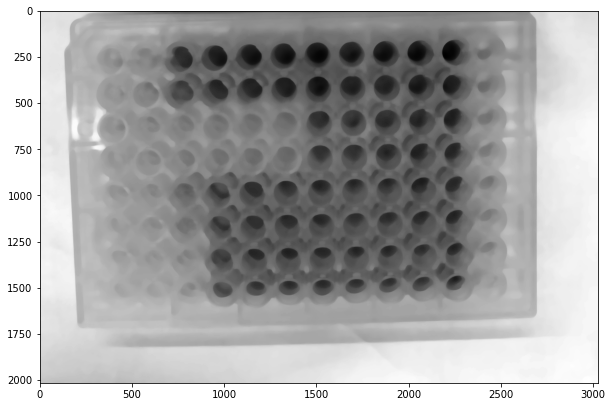

In [44]:
#Image modifications
imageRGB = io.imread(link + name)
image = imageRGB[:,:,2] #all rows & columns of the 3rd layer
plt.figure(figsize=(10,10))
#only grayscale:
plt.imshow(image,cmap='gray')
#Cutting the image
image = image[image.shape[0]//2:image.shape[0],:]
print(image.shape)
plt.imshow(image, cmap='gray')

#Removal of reflections
image_average = skf.median(image,selem=skm.disk(20))
plt.imshow(image_average, cmap = 'gray')
plt.show()

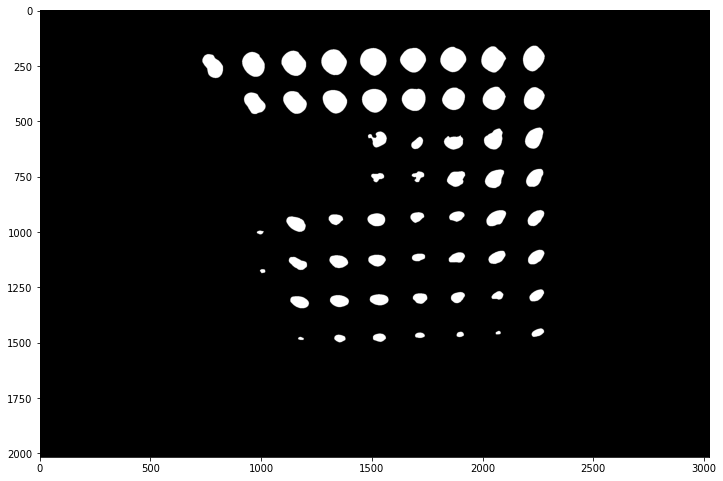

In [54]:
#Choose a threshold 

manual_threshold = 70
threshold_image = image_average < manual_threshold
plt.figure(figsize = (12,12))
plt.imshow(threshold_image, cmap = 'gray')
plt.show()

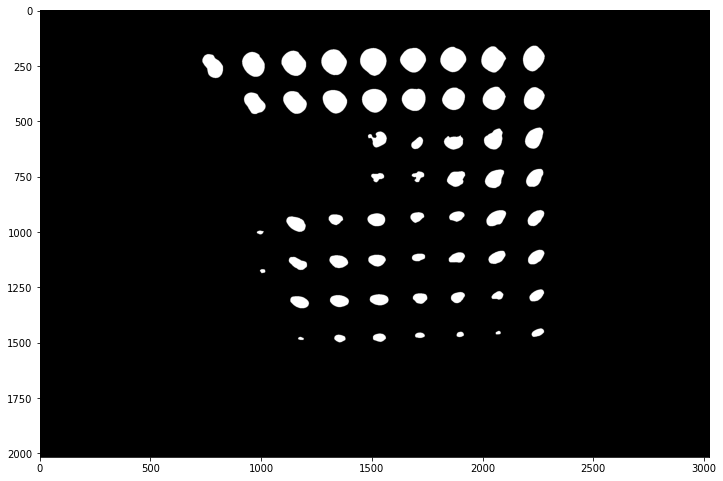

Counted bins in IMG_5393.png : 29


In [56]:
#Algorithm for counting the number of bins
import cv2
th, threshed = cv2.threshold(image_average, 70, 50, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
plt.figure(figsize=(12, 12))
plt.imshow(threshold_image, cmap ='gray')
plt.show()

#Find contours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

#Filter by area
s1 = 3
s2 = 12500
xcnts = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        xcnts.append(cnt)

print("Counted bins in",name,": {}".format(len(xcnts)))